In [1]:
# imports
%matplotlib notebook
from pylab import *
import numpy as np
import scipy as sp
from scipy import signal as sg
from scipy import stats as stats
import matplotlib.pyplot as plt

# library that loads the blackrock data files
from brpylib             import NsxFile, NevFile
import sys
import os
import math
import spike_statistics as ss
import analyze_spikeDataPB as data

In [2]:
# Read data sessions

#Initialisation des listes

Mice= [152,153,156]

nSessions=[2,2,2]

DATA=[]
Frames=[]
Reward=[]
Licks=[]
TrialStart=[]
EnteringEvent=[]

sessions=[]
FreeWater=[]

for mouse in range (len(Mice)):
    DATA.append([])
    Frames.append([])
    Reward.append([])
    Licks.append([])
    TrialStart.append([])
    EnteringEvent.append([])
    FreeWater.append([])


    
# Mouse 152
sessions.append([16,17]) #0 based index

for session in sessions[0]:
    Frames[0].append([])
    Reward[0].append([])
    Licks[0].append([])
    TrialStart[0].append([])
    EnteringEvent[0].append([])      
    datafile = "/Volumes/HENRI DD/Data/mouse152/Playback/session"+str(session+1)+"/data.nev"
    nev_file = NevFile(datafile)
    DATA[0].append(nev_file.getdata(elec_ids='all', wave_read='noread'))
    FreeWater[0].append([])
    
# Mouse 153
sessions.append([15,16]) #0 based index

for session in sessions[1]:
    Frames[1].append([])
    Reward[1].append([])
    Licks[1].append([])
    TrialStart[1].append([])
    EnteringEvent[1].append([])      
    datafile = "/Volumes/HENRI DD/Data/mouse153/Playback/session"+str(session+1)+"/data.nev"
    nev_file = NevFile(datafile)
    DATA[1].append(nev_file.getdata(elec_ids='all', wave_read='noread'))
    FreeWater[1].append([])
    
# Mouse 156
sessions.append([15,16]) #0 based index

for session in sessions[2]:
    Frames[2].append([])
    Reward[2].append([])
    Licks[2].append([])
    TrialStart[2].append([])
    EnteringEvent[2].append([])      
    datafile = "/Volumes/HENRI DD/Data/mouse156/Playback/session"+str(session+1)+"/data.nev"
    nev_file = NevFile(datafile)
    DATA[2].append(nev_file.getdata(elec_ids='all', wave_read='noread'))
    FreeWater[2].append([])



data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened


In [3]:
RewardUp=[210,210,210]
RewardLow=[150,150,150]
for mouse in range(len(Mice)):
    for session in range(nSessions[mouse]):
        Frames[mouse][session], Reward[mouse][session], Licks[mouse][session], TrialStart[mouse][session], EnteringEvent[mouse][session], FreeWater[mouse][session]  = data.getAll_events(DATA[mouse][session])
        Licks[mouse][session]=Licks[mouse][session][::2]

In [4]:
#Remove crap from the lickport
for k in range(20):        
    for mouse in range(len(Mice)):
        for session in range(nSessions[mouse]):
            Licks[mouse][session]=list(Licks[mouse][session])
            Lick_index=0
            while(Lick_index < (len(Licks[mouse][session])-1)):
                if Licks[mouse][session][Lick_index+1]-Licks[mouse][session][Lick_index]<30000*0.05:
                    Licks[mouse][session].pop(Lick_index+1)
                Lick_index+=1

In [5]:
#Remove Bursts of Licks/ Bursts of rewards
First_Licks=[]
First_Rewards=[]
for mouse in range(len(Mice)):
    First_Licks.append([])
    First_Rewards.append([])
    for session in range(nSessions[mouse]):
        if len(Licks[mouse][session])>0:
            First_Licks[mouse].append([Licks[mouse][session][0]])
        else:
            First_Licks[mouse].append([])
        if len(Reward[mouse][session])>0:
            First_Rewards[mouse].append([Reward[mouse][session][0]])
        else:
            First_Rewards[mouse].append([])  
        for Lick_index in range (len(Licks[mouse][session])-1):
            if Licks[mouse][session][Lick_index+1]-Licks[mouse][session][Lick_index]>3000*30:
                First_Licks[mouse][session].append(Licks[mouse][session][Lick_index+1])
        for Reward_index in range (len(Reward[mouse][session])-1):
            if Reward[mouse][session][Reward_index+1]-Reward[mouse][session][Reward_index]>3000*30:
                First_Rewards[mouse][session].append(Reward[mouse][session][Reward_index+1])

In [6]:
#Gerer les exceptions
First_FreeWater=[]

for mouse in range(len(Mice)):
    First_FreeWater.append([])
    for session in range(nSessions[mouse]):
        if FreeWater[mouse][session]!=[]:
            First_FreeWater[mouse].append([FreeWater[mouse][session][0]])
            for k in range(len(FreeWater[mouse][session])-1):
                if FreeWater[mouse][session][k+1]-FreeWater[mouse][session][k]>30000*3:
                    for rew_ind in range(len(First_Rewards[mouse][session])):
                        if 0<First_Rewards[mouse][session][rew_ind]-FreeWater[mouse][session][k+1]<3*30000:
                            First_FreeWater[mouse][session].append(FreeWater[mouse][session][k+1])
                
        else:
            First_FreeWater[mouse].append([])
            

In [7]:
#Repartition of first licks
Frame_at_First_Licks=[]
for mouse in range(len(Mice)):
    Frame_at_First_Licks.append([])
    for session in range(nSessions[mouse]):
        Frame_at_First_Licks[mouse].append([])
        Frame_index=0
        for Lick_index in range(len(First_Licks[mouse][session])):
            
            if First_Licks[mouse][session][Lick_index]<Frames[mouse][session][:][:,1][-1]:
                while Frames[mouse][session][:][:,1][Frame_index]<First_Licks[mouse][session][Lick_index]:
                    Frame_index+=1
                Frame_at_First_Licks[mouse][session].append(Frames[mouse][session][:][:,0][Frame_index-1])
                
#Repartition of Licks
Frame_at_Licks=[]

for mouse in range(len(Mice)):
    Frame_at_Licks.append([])
    for session in range(nSessions[mouse]):
        Frame_at_Licks[mouse].append([])
        Frame_index=0
        for Lick_index in range(len(Licks[mouse][session])):
            if Licks[mouse][session][Lick_index]<Frames[mouse][session][:][:,1][-1]:
                while Frames[mouse][session][:][:,1][Frame_index]<Licks[mouse][session][Lick_index]:
                    Frame_index+=1
                Frame_at_Licks[mouse][session].append(Frames[mouse][session][:][:,0][Frame_index-1])

In [8]:
# Compute ALL timings : reward zone/punishment/f_licks/first_rewards
EnteringReward=[]
LeavingReward=[]
EnteringPunishment=[]
LeavingPunishment=[]
Lick_trial=[]
Lick_punished_trial=[]
Reward_trial=[]
Trial_length=[]


for mouse in range(len(Mice)):
    
    EnteringReward.append([])
    LeavingReward.append([])
    EnteringPunishment.append([])
    LeavingPunishment.append([])
    Trial_length.append([])
    Lick_trial.append([])
    Lick_punished_trial.append([])
    Reward_trial.append([])


    for session in range(nSessions[mouse]):
        if session<10:
            punishment_low=90
            punishment_high=270
        if 10<=session<15:
            punishment_low=90
            punishment_high=270
        
        
        EnteringReward[mouse].append([])
        LeavingReward[mouse].append([])
        EnteringPunishment[mouse].append([])
        LeavingPunishment[mouse].append([])
        Trial_length[mouse].append([])
        Lick_trial[mouse].append([])
        Lick_punished_trial[mouse].append([])
        Reward_trial[mouse].append([])
        ind_debut=0
        ind_fin=0
        
        
        for trial in range(len(TrialStart[mouse][session])-1):
            
            EnteringReward[mouse][session].append([])
            LeavingReward[mouse][session].append([])
            EnteringPunishment[mouse][session].append([])
            LeavingPunishment[mouse][session].append([])
            Lick_trial[mouse][session].append([])
            Lick_punished_trial[mouse][session].append([])
            Reward_trial[mouse][session].append([])
            


            while Frames[mouse][session][:][:,1][ind_debut]<TrialStart[mouse][session][trial]:
                ind_debut+=1
    
            while Frames[mouse][session][:][:,1][ind_fin]<TrialStart[mouse][session][trial+1]:
                ind_fin+=1

            line=list(Frames[mouse][session][:][:,0][ind_debut:ind_fin])
            
            Trial_length[mouse][session].append((Frames[mouse][session][:][:,1][ind_fin]-Frames[mouse][session][:][:,1][ind_debut])/30000.-5)
            t=0
            for t in range(len(line)-2):
                
                #Leaving Reward
                if RewardLow[mouse]-10<int(line[t+1])<RewardLow[mouse]:
                    if RewardLow[mouse]+10>int(line[t]) >=RewardLow[mouse]:
                        LeavingReward[mouse][session][trial].append(t/100.)   
                if RewardUp[mouse]+10>int(line[t+1])>RewardUp[mouse]:
                    if RewardUp[mouse]-10<int(line[t])<=RewardUp[mouse]:
                        LeavingReward[mouse][session][trial].append(t/100.)
                    
                #Entering Punishment events, theoritical 
                if punishment_low-30<int(line[t+1])<=punishment_low:
                    if punishment_low+30>int(line[t])>punishment_low:
                        EnteringPunishment[mouse][session][trial].append(t/100.)
                if punishment_high+30>int(line[t+1])>=punishment_high:
                    if punishment_high-30<int(line[t])<punishment_high:
                        EnteringPunishment[mouse][session][trial].append(t/100.)
                
                #Leaving Punishment events, theoritical 
                if punishment_low+30>int(line[t+1])>punishment_low:
                    if punishment_low-30<int(line[t])<=punishment_low:
                        LeavingPunishment[mouse][session][trial].append(t/100.)
                if punishment_high-30<int(line[t+1])<punishment_high:
                    if punishment_high+30>int(line[t])>=punishment_high:
                        LeavingPunishment[mouse][session][trial].append(t/100.)
            
            
            # Add all licks
            for lick_ind in range (len(Licks[mouse][session])):
                if TrialStart[mouse][session][trial]<=Licks[mouse][session][lick_ind]<=TrialStart[mouse][session][trial+1]:
                    Lick_trial[mouse][session][trial].append((Licks[mouse][session][lick_ind]-TrialStart[mouse][session][trial])/30000.) 
                    if Frame_at_Licks[mouse][session][lick_ind]<=punishment_low or Frame_at_Licks[mouse][session][lick_ind]>=punishment_high:
                        if TrialStart[mouse][session][trial+1]-Licks[mouse][session][lick_ind]<5.5*30000:
                            if Lick_punished_trial[mouse][session][trial]==[]:
                                Lick_punished_trial[mouse][session][trial].append((Licks[mouse][session][lick_ind]-TrialStart[mouse][session][trial])/30000.)
                                Trial_length[mouse][session][trial] = (Licks[mouse][session][lick_ind]-TrialStart[mouse][session][trial])/30000.
                        else:
                            Lick_trial[mouse][session][trial].append((Licks[mouse][session][lick_ind]-TrialStart[mouse][session][trial])/30000.) 
            
            
            #Same for First rewards
            for rew_ind in range (len(First_Rewards[mouse][session])):
                if TrialStart[mouse][session][trial]<First_Rewards[mouse][session][rew_ind]<TrialStart[mouse][session][trial+1]:
                    Reward_trial[mouse][session][trial].append((First_Rewards[mouse][session][rew_ind]-TrialStart[mouse][session][trial])/30000.) 
            
            for ent_ind in range (len(EnteringEvent[mouse][session])):
                if TrialStart[mouse][session][trial]<EnteringEvent[mouse][session][ent_ind]<TrialStart[mouse][session][trial+1]:
                    EnteringReward[mouse][session][trial].append((EnteringEvent[mouse][session][ent_ind]-TrialStart[mouse][session][trial])/30000.) 
            




In [ ]:
#% of rewarded trials:
rewTrialperf=[]
for mouse in range(len(Mice)):
    rewTrialperf.append([])
    for session in range(nSessions[mouse]):
        ntrial=0.0
        nrew=0.0
        for trial in range(len(TrialStart[mouse][session])-1): 
            if Trial_length[mouse][session][trial]>0.1:
                ntrial+=1
                if Reward_trial[mouse][session][trial]!=[]:
                    nrew+=1
        rewTrialperf[mouse].append((nrew-len(First_FreeWater[mouse][session]))/ntrial*100)





In [ ]:
#Load the chance levels
ratios_chance=[]
ratios_dect_chance=[]
for mouse in range(len(Mice)):
    ratios_chance.append([])
    ratios_dect_chance.append([])
    for session in sessions[mouse]:
        F=open("/Volumes/HENRI DD/Data/Behaviour/mouse"+str(Mice[mouse])+"/Playback/session"+str(session+1)+"/chancevalue.txt",'r')
        data=F.readlines()
        L=data[0].split(',')
        
        ratios_chance[mouse].append(float(L[0]))
        ratios_dect_chance[mouse].append(float(L[1]))
        
        F.close()

In [ ]:
for mouse in range(len(Mice)):
    for session in [-1]:
        for k in range(50):
            Ent_index=0
            while Ent_index < len(EnteringEvent[mouse][session])-1:
                if EnteringEvent[mouse][session][Ent_index+1]-EnteringEvent[mouse][session][Ent_index]<5*30000:
                    EnteringEvent[mouse][session].pop(Ent_index+1)
                Ent_index+=1

In [ ]:
#% rewarded trials
plt.figure(figsize=(8,4))
ratios_perf=[]
abscisse=[]

plt.subplot(1,2,1)
for mouse in range(len(Mice)):
    ratios_perf.append([])
    abscisse.append(range(max(nSessions)-nSessions[mouse],max(nSessions),1))
    if mouse>=0:
        
        
        for session in range(nSessions[mouse]):    
            ratios_perf[mouse].append((len(First_Rewards[mouse][session])-len(First_FreeWater[mouse][session]))/(len(First_Licks[mouse][session])-len(First_FreeWater[mouse][session])))
    
        plt.plot(abscisse[mouse],rewTrialperf[mouse],color='skyblue', lw=0.5)
        #plt.plot(ratios_chance[mouse],color='black',ls='--')
plt.axis((-1,2,0,70))
    
#Average performance evolution
av=[]
avc=[]
for session in range(max(nSessions)):
    av.append(0)
    avc.append(0)

        
for session in range(-max(nSessions),0,1): 
    nmouse=0
    for mouse in range(len(Mice)):
        if mouse>=0:
            if abs(session)<=nSessions[mouse]:
                av[session]+=(rewTrialperf[mouse][session])
                avc[session]+=(ratios_chance[mouse][session])*100
                nmouse+=1
            
    av[session]/=nmouse
    avc[session]/=nmouse
    
plt.plot(av,color='skyblue',lw=2)
#plt.plot(avc,color='darkturquoise',ls='--',lw=2)


plt.subplot(1,2,2)
Gain_perf=[]

for mouse in range (len(Mice)):
    Gain_perf.append([])
    if mouse>=0:
        for session in range(nSessions[mouse]):    
            Gain_perf[mouse].append(rewTrialperf[mouse][session]-ratios_chance[mouse][session]*100)
        plt.plot(abscisse[mouse],Gain_perf[mouse],color='darkblue', lw=0.5)
plt.axis((-1,2,-10,40))

            
#Average performance evolution
avg=[]
for session in range(max(nSessions)):
    avg.append(0)
    
for session in range(-max(nSessions),0,1): 
    nmouse=0
    for mouse in range(len(Mice)):
        if mouse>=0:
            if abs(session)<=nSessions[mouse]:
                avg[session]+=(Gain_perf[mouse][session])
                nmouse+=1         
    avg[session]/=nmouse
    
plt.plot(avg,color='darkblue',lw=2)
plt.axhline(0,color='black',lw=1)
plt.show()

In [ ]:
plt.savefig("/Users/hlassagne/Desktop/FigurePythonCDT/DestructuredPerf.pdf",orientation="portrait", dpi='figure')

In [ ]:
plt.figure(figsize=(8,4))


ratios_dect=[]

plt.subplot(1,2,1)

for mouse in range(len(Mice)):
    ratios_dect.append([])
    if mouse>=0:
        for session in range(nSessions[mouse]):
            ratios_dect[mouse].append((len(First_Rewards[mouse][session])-len(First_FreeWater[mouse][session]))/(len(EnteringEvent[mouse][session]))*100)
        plt.plot(abscisse[mouse],ratios_dect[mouse],color="limegreen", lw = 0.4)
    
#Average performance evolution
avd=[]
avdc=[]
for session in range(max(nSessions)):
    avd.append(0)
    avdc.append(0)

        
for session in range(-max(nSessions),0,1):  
    nmouse=0
    
    for mouse in range(len(Mice)):
        if mouse>=0:
            if abs(session)<=nSessions[mouse]:
                avd[session]+=(ratios_dect[mouse][session])
                avdc[session]+=(ratios_dect_chance[mouse][session])*100
                nmouse+=1
            
    avd[session]/=nmouse
    avdc[session]/=nmouse
    
plt.plot(avd,color="limegreen",lw=2)
#plt.plot(avdc,color="green",ls='--',lw=2)
plt.axis((-1,2,30,101))



plt.subplot(1,2,2)
Gain_dperf=[]

for mouse in range (len(Mice)):
    Gain_dperf.append([])
    if mouse>=0:
        for session in range(nSessions[mouse]):    
            Gain_dperf[mouse].append(ratios_dect[mouse][session]-ratios_dect_chance[mouse][session]*100)
        plt.plot(abscisse[mouse],Gain_dperf[mouse],color='green', lw=0.5)
plt.axis((-1,2,-10,60))

            
#Average performance evolution
avdg=[]
for session in range(max(nSessions)):
    avdg.append(0)
    
for session in range(-max(nSessions),0,1): 
    nmouse=0
    for mouse in range(len(Mice)):
        if mouse>=0:
            if abs(session)<=nSessions[mouse]:
                avdg[session]+=(Gain_dperf[mouse][session])
                nmouse+=1         
    avdg[session]/=nmouse
    
plt.plot(avdg,color='green',lw=2)
plt.axhline(0,color='black',lw=1)

plt.show()

In [ ]:
plt.savefig("/Users/hlassagne/Desktop/FigurePythonCDT/DestructuredDect.pdf",orientation="portrait", dpi='figure')

In [ ]:
#First/Last

plt.figure(figsize=(7,10))

   


# Only trials which entered the reward

t=1
for mouse in range (1,2,1):
    for session in [0,1]:
        plt.subplot(2,1,t)
        t+=1
        
        skip=0
        scale=0
        for trial in range(5,100,1):#len(Lick_punished_trial[mouse][session])):
            if EnteringReward[mouse][session][trial]==[]:
                skip+=1
            else:
                scale+=1
                
                plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],Trial_length[mouse][session][trial],20,facecolor='silver',edgecolor='none',alpha=1)
                
                plt.scatter(Lick_trial[mouse][session][trial],np.ones(len(Lick_trial[mouse][session][trial]))*(trial-skip),color='black', s=3*90**2/((len(EnteringEvent[mouse][session]))**2))
                plt.scatter(Reward_trial[mouse][session][trial],np.ones(len(Reward_trial[mouse][session][trial]))*(trial-skip),color='chartreuse', s=3*90**2/((len(EnteringEvent[mouse][session]))**2))
                plt.scatter(Lick_punished_trial[mouse][session][trial],np.ones(len(Lick_punished_trial[mouse][session][trial]))*(trial-skip),color='tomato', s=3*90**2/((len(EnteringEvent[mouse][session]))**2))


                
                if len(LeavingPunishment[mouse][session][trial])>0:
                    plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],0,LeavingPunishment[mouse][session][trial][0],facecolor='tomato',edgecolor='none',alpha=0.2)
                else:
                    plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],0,Trial_length[mouse][session][trial],facecolor='tomato',edgecolor='none',alpha=0.2)
                    
                    
                if LeavingReward[mouse][session][trial]!=[]:
                    for k in range(len(LeavingReward[mouse][session][trial])):
                        plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],EnteringReward[mouse][session][trial][k],LeavingReward[mouse][session][trial][k],facecolor='chartreuse',edgecolor='none',alpha=0.2)
                else:
                    if EnteringReward[mouse][session][trial]!=[]: 
                        plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],EnteringReward[mouse][session][trial][0],Trial_length[mouse][session][trial],facecolor='chartreuse',edgecolor='none',alpha=0.2)
                
                
                if EnteringPunishment[mouse][session][trial]!=[]:
                    for k in range(len(EnteringPunishment[mouse][session][trial])):
                        if len(LeavingPunishment[mouse][session][trial])>k+1:
                            plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],EnteringPunishment[mouse][session][trial][k],LeavingPunishment[mouse][session][trial][k+1],facecolor='tomato',edgecolor='none',alpha=0.2)
                        else:
                            plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],EnteringPunishment[mouse][session][trial][k],Trial_length[mouse][session][trial],facecolor='tomato',edgecolor='none',alpha=0.2)
                plt.axis((-1,20,-1,30))



                

plt.show()

In [ ]:
plt.savefig("/Users/hlassagne/Desktop/ExamplesDestructured.pdf",orientation="portrait", dpi='figure')

In [ ]:
#histogram
degrees=range(0,360,10)
Weights=[]
radians = np.deg2rad(degrees)
reward_degrees=range(RewardLow[0],RewardUp[0],1)
reward_radians = np.deg2rad(reward_degrees)

fig, axes = plt.subplots(nrows=2,ncols= 2 ,figsize=(5,5),subplot_kw=dict(polar=True))
fig.tight_layout() 

for mouse in range (len(Mice)):
    Weights.append([])
    for session in range(nSessions[mouse]):
        Weights[mouse].append([])
s=0
for mouse in range (1,2,1):
    for session in [0,1]:
        
        if 0<=session<10:
            punish_degrees=range(270,450,1)
            punish_radians = np.deg2rad(punish_degrees)
        if 10<=session<15:
            punish_degrees=range(270,450,1)
            punish_radians = np.deg2rad(punish_degrees)
        axes[s][0].set_title(str(Mice[mouse])+" Session : "+str(session+1))
        b=np.histogram(Frame_at_First_Licks[mouse][session],bins=36,range=(0,360))
        
        
        for l in range(0,36,1):
            Weights[mouse][session].append(0)  
        for i in range (len(Frames[mouse][session])):
            frame_nb=int(Frames[mouse][session][i][0]/10.001)
            Weights[mouse][session][frame_nb]+=1 

        #for j in range (len(b[0])):
            #if(Weights[mouse][session][j]!=0):
                #b[0][j] = 100000*float(b[0][j])/Weights[mouse][session][j]
        
        axes[s][0].bar((reward_radians[0]+reward_radians[-1])/2,1.5*max(b[0]),width=2*np.pi/360.*len(reward_radians),color='chartreuse')   
        axes[s][0].bar((punish_radians[0]+punish_radians[-1])/2,1.5*max(b[0]),width=2*np.pi/360.*len(punish_radians),color='tomato')

    
        axes[s][0].bar(radians,b[0],width=2*10*np.pi/360.,bottom=0.3*max(b[0]),color='black')
        axes[s][0].set_theta_zero_location("S")
        axes[s][0].set_rticks([max(b[0])])  # less radial ticks

        axes[s][0].set_xticks(np.pi/180. * np.linspace(30,  390 , 6 , endpoint=False))
        axes[s][0].set_thetalim(0, 2*np.pi)
        # less radial ticks
        #axes[s][0].yaxis.set_major_formatter(plt.NullFormatter())
        axes[s][0].set_rmax(1.5*max(b[0]))
        #axes[s][0].xaxis.set_major_formatter(plt.NullFormatter())
        
        
        if session>0:
            b_shift=[]
            for ind_to_shift in [0,1,2,9,10,11,12,13,14,27,28,29,30,31,32,15,16,17,18,19,20,3,4,5,6,7,8,21,22,23,24,25,26,33,34,35]:
                b_shift.append(b[0][ind_to_shift])
            

            axes[s][1].bar((reward_radians[0]+reward_radians[-1])/2,1.5*max(b[0]),width=2*np.pi/360.*len(reward_radians),color='chartreuse')
            punish_degrees=range(90,150,1)
            punish_radians = np.deg2rad(punish_degrees)
            axes[s][1].bar((punish_radians[0]+punish_radians[-1])/2,1.5*max(b[0]),width=2*np.pi/360.*len(punish_radians),color='tomato')
            
            punish_degrees=range(210,270,1)
            punish_radians = np.deg2rad(punish_degrees)
            axes[s][1].bar((punish_radians[0]+punish_radians[-1])/2,1.5*max(b[0]),width=2*np.pi/360.*len(punish_radians),color='tomato')
            
            punish_degrees=range(330,390,1)
            punish_radians = np.deg2rad(punish_degrees)
            axes[s][1].bar((punish_radians[0]+punish_radians[-1])/2,1.5*max(b[0]),width=2*np.pi/360.*len(punish_radians),color='tomato')
            



            axes[s][1].set_xticks(np.pi/180. * np.linspace(30,  390 , 6 , endpoint=False))
            axes[s][1].set_thetalim(0, 2*np.pi)
            
    
            axes[s][1].bar(radians,b_shift,width=2*10*np.pi/360.,bottom=0.3*max(b[0]),color='black')
            axes[s][1].set_theta_zero_location("S")
            axes[s][1].set_rticks([max(b[0])])  # less radial ticks

            #axes[session][1].yaxis.set_major_formatter(plt.NullFormatter())
            axes[s][1].set_rmax(1.5*max(b[0]))
        s+=1
        
plt.show()

In [ ]:
plt.savefig("/Users/hlassagne/Desktop/FigurePythonTeamMeating/PieDestructured.pdf",orientation="portrait", dpi='figure')

In [35]:

Reaction_time=[]
Sd_Reaction_time=[]
meanReac=[[0],[0]]

m=-1

for mouse in range (2,3,1):
    m+=1
    T=[[],[]]
    s=0
    Reaction_time.append([])
    Sd_Reaction_time.append([])
    
    for session in [0,1]: # first session randomized, Last session easy,
        for trial in range(len(Lick_trial[mouse][session])):
            if EnteringReward[mouse][session][trial]!=[] and Lick_trial[mouse][session][trial]!=[]:
                T[s].append(Lick_trial[mouse][session][trial][0]-EnteringReward[mouse][session][trial][0])
            
                
        
        Reaction_time[m].append(np.median(T[s]))
        Sd_Reaction_time[m].append(np.std(T[s]))
        
        s+=1
        


print(Reaction_time)
for k in range(1):
    meanReac[0]+=Reaction_time[k][0]
    meanReac[1]+=Reaction_time[k][1]
    
    
meanReac[0]/=3
meanReac[1]/=3
print(meanReac)

[[-1.0823500000000004, 0.49086666666666545]]
[array([-0.36078333]), array([0.16362222])]


<IPython.core.display.Javascript object>


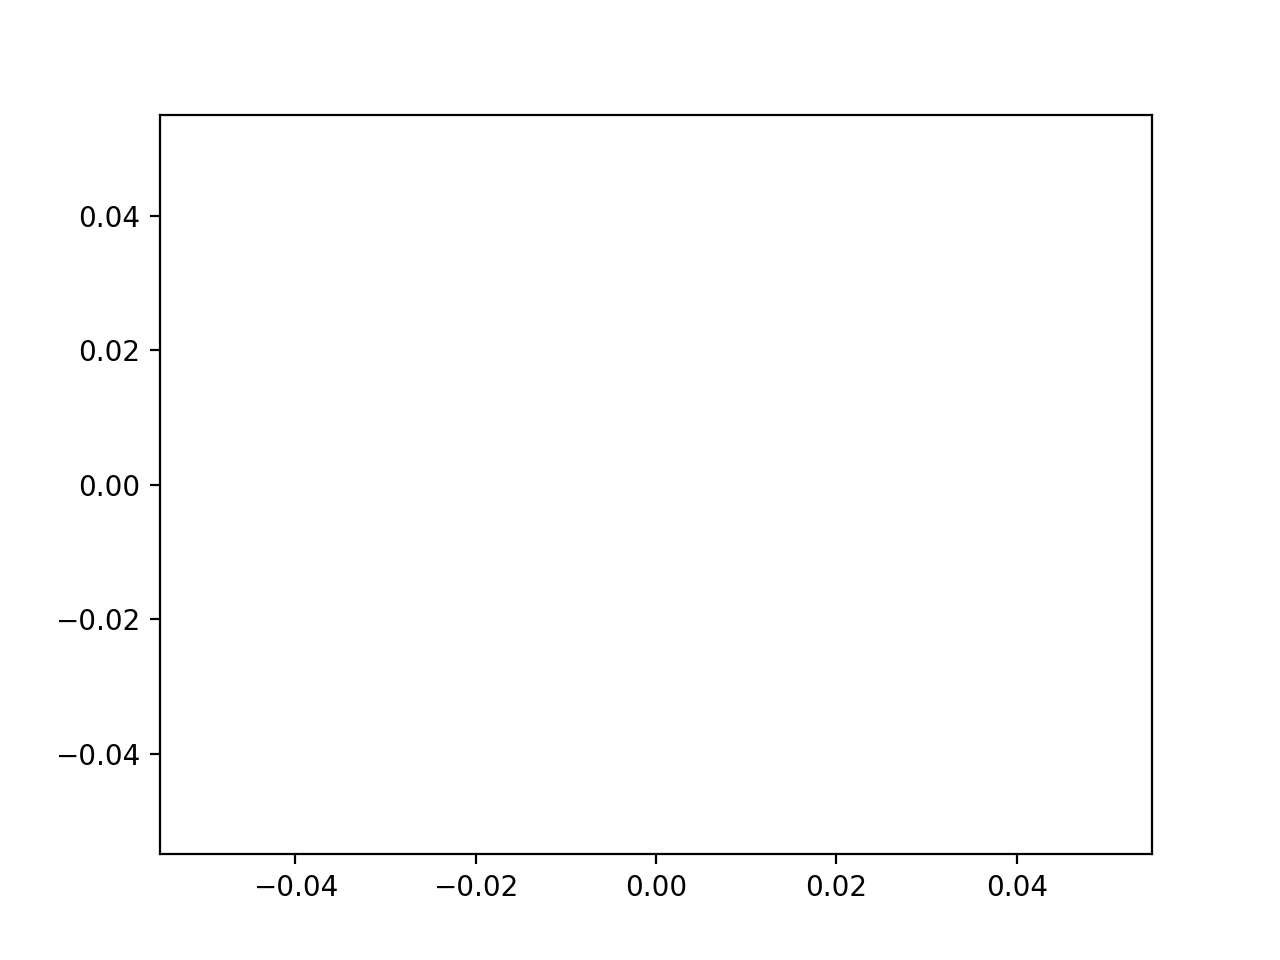

IndexError: list index out of range

In [25]:
plt.figure()
for mouse in range (len(Mice)):
    plt.plot(Reaction_time[mouse],color="violet",lw=0.5)
    
plt.plot(meanReac,color="violet",lw=2)


plt.axis((-1,2,-3,2))
plt.show()

In [36]:
L=[]
M=[]

for k in range(len(T[0])):
    L.append(T[0][k])
for k in range(len(T[1])):
    M.append(T[1][k])
    
A=stats.mannwhitneyu(L, M, use_continuity=True, alternative="less")


print(A)


MannwhitneyuResult(statistic=359.0, pvalue=5.8087964266306764e-05)


In [ ]:
#Chance levels for each session
#Create fake sessions (Careful this code is awesome)



import random
F=open("/Users/hlassagne/Documents/Owncloud/BMI/Henri/Analysis/Analysis_code/SpyderCode/playback_trials_rewards.txt",'r')
data=F.readlines()
F.close()
FramesEx=[]
RewardEx=[]
ratios_chance=[]
ratios_dect_chance=[]
ratios_rewTrialperf_chance=[]

#Reset_Function
def reset_trial():
    global Frames_Trial
    global find
    global boolEnter
    global ntrialf
    global boolrew
    index_trial=int(rand()*len(data))
    line=data[index_trial].split(',')
    Frames_Trial=[]
    boolEnter=0
    for ind in range(len(line)-1):
        Frames_Trial.append(int(line[ind]))
    find=0
    ntrialf+=1
    boolrew=0
    
    
for mouse in range (len(Mice)):
    ratios_chance.append([])
    ratios_dect_chance.append([])
    ratios_rewTrialperf_chance.append([])
        
    for session in range(nSessions[mouse]):
        ntrialf=0
        nrewf=0
        print("mouse: "+str(Mice[mouse])+" ,session: "+str(session))
        ratio=[]
        ratio_d=[]
        ratio_t=[]
        
        boolEnter=0
        
        for instance in range(50):
            nEnter=0

            low=90
            up=270
                
                
            Frames_Fake=[]
            Reward_Fake=[]

            Frames_Trial=[]
            find=0

            #Init the time clock
            time=0.0
            Lick_index=0
            reset_trial()

            while time<30000*60*30: #Session last 30 minute
                if Lick_index<len(Licks[mouse][session]):
                    CurrentLickTime=Licks[mouse][session][Lick_index]
                
                if find<len(Frames_Trial):
                    Frames_Fake.append(Frames_Trial[find])
                    find+=1
                    
                else:
                    reset_trial()      
                    for pause in range (500):
                        Frames_Fake.append(0)
                        time+=30000*0.01
                        if CurrentLickTime<time:
                            Lick_index+=1
                            if Lick_index<len(Licks[mouse][session]):
                                CurrentLickTime=Licks[mouse][session][Lick_index]
                                
                
                if RewardLow[mouse]<=Frames_Fake[-1]<=RewardUp[mouse]:
                    if boolEnter==0:
                        nEnter+=1
                        boolEnter=1
                        
                            
                time+=30000*0.01
    
                if CurrentLickTime<time:
                    Lick_index+=1
                    if low<Frames_Fake[-1]<up:
                        if RewardLow[mouse]<Frames_Fake[-1]<RewardUp[mouse]:
                            if Lick_index<len(Licks[mouse][session]):
                                Reward_Fake.append(Licks[mouse][session][Lick_index-1])
                                if boolrew==0:
                                    nrewf+=1
                                    boolrew=1
                    else: 
                        reset_trial()
                        for pause in range (500):
                            Frames_Fake.append(0)
                            time+=30000*0.01
                            if CurrentLickTime<time:
                                Lick_index+=1
                                if Lick_index<len(Licks[mouse][session]):
                                    CurrentLickTime=Licks[mouse][session][Lick_index]

                    
        #Remove bursts of licks/Bursts of rewards
            First_Licksf=[Licks[mouse][session][0]]
        
            First_Rewardsf=[]
            if Reward_Fake!=[]:
                First_Rewardsf.append(Reward_Fake[0])
            
            for j in range (len(Licks[mouse][session])-1):
                if Licks[mouse][session][j+1]-Licks[mouse][session][j]>3000*30:
                    First_Licksf.append(Licks[mouse][session][j+1])
    

            for j in range (len(Reward_Fake)-1):
                if Reward_Fake[j+1]-Reward_Fake[j]>3000*30:
                    First_Rewardsf.append(Reward_Fake[j+1])
        
            ratio.append(len(First_Rewardsf)/len(First_Licksf)) 
            
            if (len(First_Rewardsf))>len(First_FreeWater[mouse][session]):
                ratio_d.append((len(First_Rewardsf)/(nEnter)))
            else:
                ratio_d.append(0)
                
            ratio_t.append(float(nrewf)/ntrialf)
                
        ratios_chance[mouse].append(np.mean(ratio))
        
        ratios_dect_chance[mouse].append(np.mean(ratio_d))
        ratios_rewTrialperf_chance[mouse].append(np.mean(ratio_t))
        

In [ ]:
plt.savefig("/Users/hlassagne/Desktop/FigurePythonTeamMeating/Anticipation.pdf",orientation="portrait", dpi='figure')

In [ ]:
for mouse in range(len(Mice)):
    s=0
    for session in (sessions[mouse]):  
        F=open("/Volumes/HENRI DD/Data/Behaviour/mouse"+str(Mice[mouse])+"/Playback/session"+str(session+1)+"/chancevalue.txt",'w')
        F.write(str(ratios_chance[mouse][s])+','+str(ratios_dect_chance[mouse][s]))
        
        s+=1
        F.close()